In [40]:
import quandl
podatci = quandl.get("LME/PR_CO", authtoken="Bygw8KP9XWpisC6gGapq") #cijene kobalta
podatci.columns

Index(['Cash Buyer', 'Cash Seller & Settlement', '3-months Buyer',
       '3-months Seller', '15-months Buyer', '15-months Seller'],
      dtype='object')

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

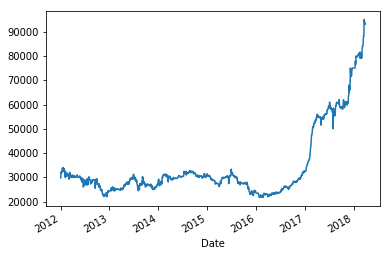

In [77]:
cijena = podatci["Cash Buyer"].as_matrix(columns= None)  #y vrijednosti
podatci["Cash Buyer"].plot()

In [132]:
X = np.c_[np.ones(len(cijena)) , range(len(cijena)) ]
initTheta = np.array([0,0])

In [121]:
def LinRegComputeCost(X ,y ,theta ):
    m = len(y)
    h = np.dot(X, theta)
    J = (1/(2*m)) * np.sum(np.power(h-y,2))
    return J

In [174]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_povijest = np.zeros(num_iters)
    for i in range(0, num_iters):
        h = np.dot(X,theta)
        grad = np.dot(X.transpose(), h-y)/m
        theta = theta - alpha*grad
        J_povijest[i] = LinRegComputeCost(X ,y ,theta)
    return theta, J_povijest   

In [177]:
br_iteracija = 1500
alpha = 0.01
X_test = X[ :int(0.7*len(X)), : ]  #prvih 70%
y_test = np.multiply(cijena[ :int(0.7*len(cijena))], 0.001)   # cijena u 1000 $
optimal_theta, J_history = gradientDescent(X_test, y_test, initTheta, 0.000005, br_iteracija)
optimal_theta

array([0.05458049, 0.03788446])

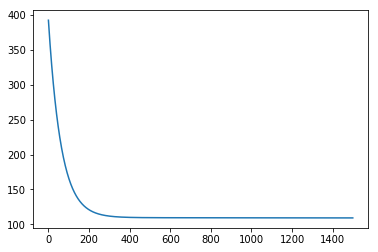

In [178]:
plt.plot(J_history)
plt.show()